Esercizio 1 Mock

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, cophenet, fcluster
from scipy.spatial.distance import pdist, squareform, cdist
from mpl_toolkits.mplot3d import Axes3D  # for 3D plots
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

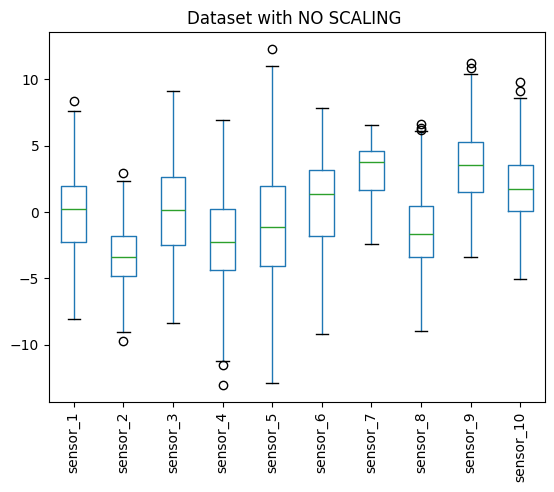

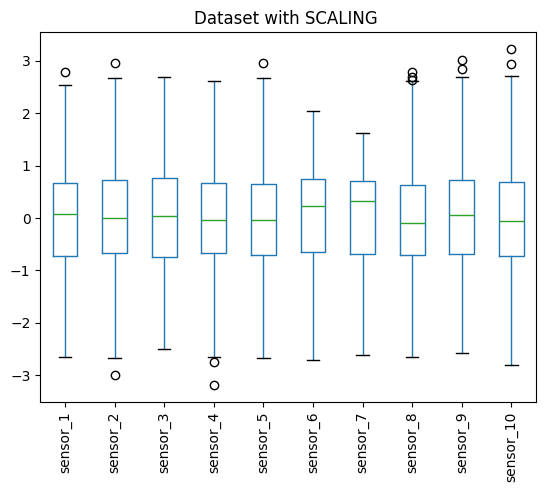

In [ ]:
SENSORS_PATH = 'wearable_sensors.csv'
df = pd.read_csv(SENSORS_PATH)
df

#UNSUPERVISED SETTING => only the matrix of features X

ax = df.boxplot(rot=90, grid=False)
plt.title('Dataset with NO SCALING ')
plt.show()
#centering the dataset and scaling
df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

ax = df_scaled.boxplot(rot=90, grid=False)
plt.title('Dataset with SCALING ')
plt.show()

1. Perform PCA. Plot the scree curve and the cumulative variance curve. How many components
explain at least 95% of the variance?§

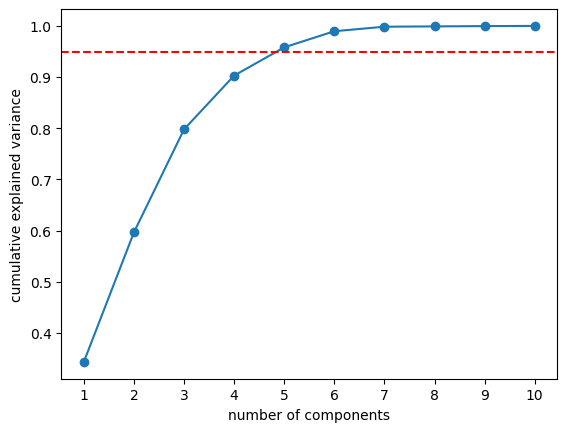

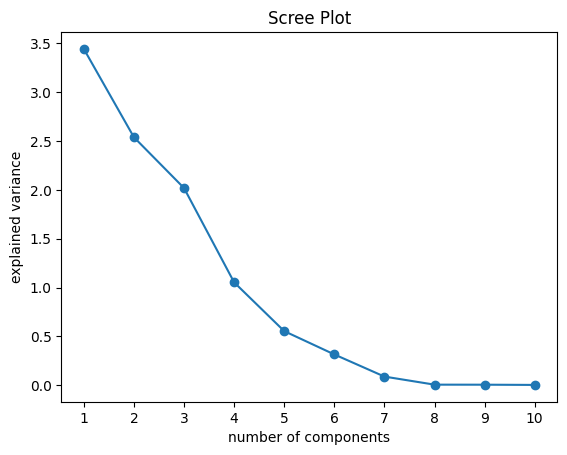

In [ ]:
#scree curve = variance explained
#cumulative = cum_sum(prop_var_exp)
pca_scaled_df = PCA()
pca_scaled_df.fit(df_scaled)

var_exp = pca_scaled_df.explained_variance_
cum_var_exp = np.cumsum(pca_scaled_df.explained_variance_ratio_)

# Crea un array per il numero di componenti
num_comp = len(var_exp)

#plot of CUMULATIVE explained variance
plt.plot(range(1,num_comp+1),np.cumsum(pca_scaled_df.explained_variance_ratio_),marker='o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(range(1,num_comp+1))
# Aggiungi la linea orizzontale per la soglia del 95% della varianza totale
plt.axhline(y=0.95, color='red', linestyle='--', label='Soglia 95%')
plt.show()

##add the horizontal line of threshold of cum_variance level = 0.95


#SCREE PLOT = plot of the variances
plt.plot(range(1,num_comp+1),pca_scaled_df.explained_variance_,marker='o')
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.title('Scree Plot')
plt.xticks(range(1,num_comp+1))
plt.show()

#chooce n-components to reach % level of variance
n_components_95 = 5

2. Plot the loadings of the first 2 PCs and interpret them.

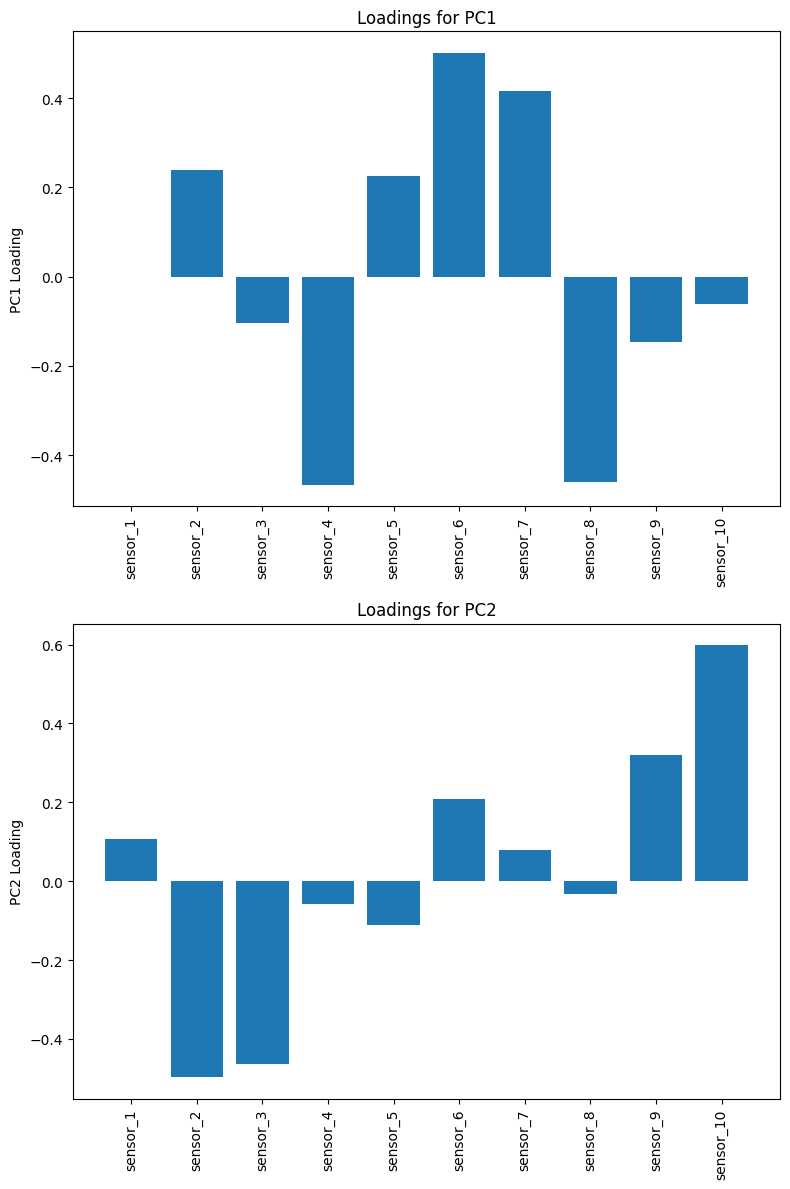

In [ ]:
loadings_matrix = pca_scaled_df.components_.T #matrices of the EIGENVECTORS of the covariance matrix

#the j-column of the matrix rapresents the j-principal component

#Barplots of loadings for the first n PCs
n = 2
fig, axes = plt.subplots(n, 1, figsize=(8, 12))

for i, ax in enumerate(axes):
    ax.bar(df.columns, loadings_matrix[:, i]) #estraggo la componente principale i-esima (tutti i loadings)
    ax.set_xticklabels(df.columns, rotation=90)
    ax.set_ylabel(f"PC{i+1} Loading")
    ax.set_title(f"Loadings for PC{i+1}")

plt.tight_layout()
plt.show()

#Commento: i valori dei loadings piu alti rappresentano le variabili che spiegano meglio la varianza per la rispettiva componente principale

Le variabili che spiegano maggiormente la varianza ll'interno della prima componente sono:sensor4, sensor6,7,8.

Le variabili che spiegano maggiormente la var. all'interno della seconda pc sono sensors 2,3,10.

Per quanto riguarda la PC1: i sensors 6,7 sono POSITIVAMENTE CORRELATI con quest'ultima mmentre i sensori 4 e 8 negativamente (ovvero a valori alti di sensori 4,8 corrispondono valori bassi della PC1)

PC2: 2,3 negativamente correlati e  10 positivamente.


Segno positivo (+): La variabile originale e la componente principale sono correlate positivamente. Quando il valore del sensore aumenta, aumenta anche il valore (lo "score") della componente.

Segno negativo (-): La variabile originale e la componente principale sono correlate negativamente. Quando il valore del sensore aumenta, il valore della componente diminuisce.

In [ ]:
##########

3. Using the retained PCs, compare hierarchical clustering and K–means.
(a) For the K-Means, use the elbow method to select the optimal number of clusters.
(b) For the hierarchical clustering, use the average linkage and cut the dendrogram to obtain
the same number of clusters as K-means.

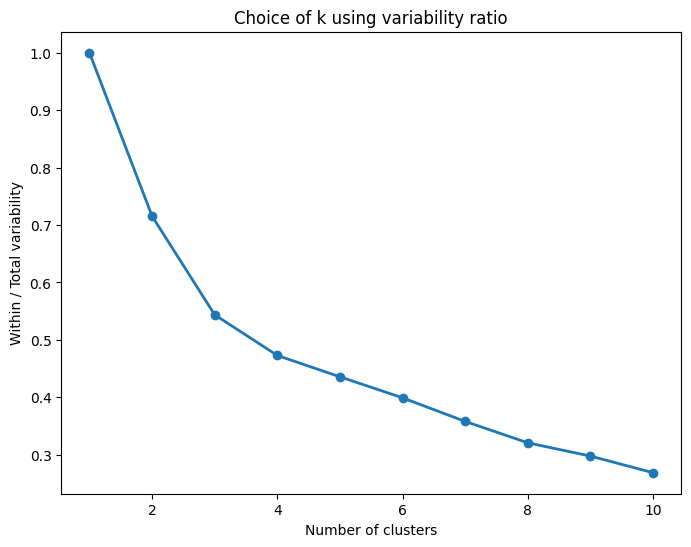

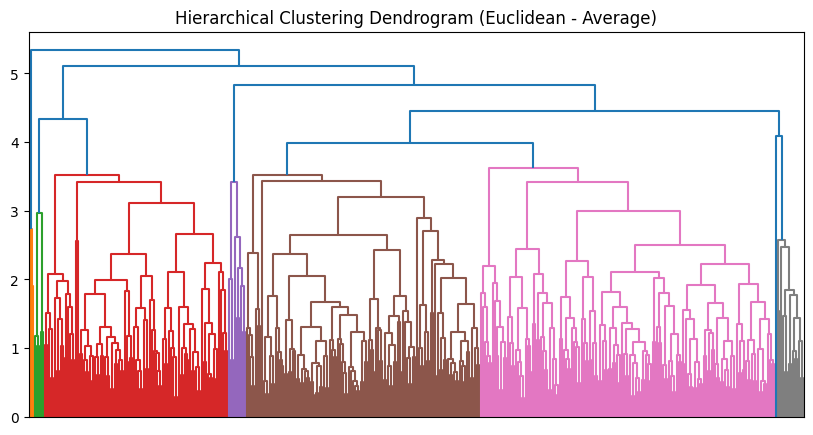

In [5]:
#a
num_components = 5

pca_n_components = PCA(n_components = num_components, random_state=42)
projected_dataset  = pca_n_components.fit_transform(df_scaled) #dataset projected to n principal components of the PCA
X = projected_dataset #In this case, X is a NumPy array.

#K-means
from sklearn.cluster import KMeans
#Variability Ratio (looks for minimal => elbow method)
w = []
b = []

totss = np.sum((X - X.mean(axis=0))**2)

# try num of clusters= 1,3,...10

for k_val in range(1, 11):
    km = KMeans(n_clusters=k_val, random_state=42).fit(X)
    withinss = km.inertia_ # WSS
    between_ss = totss - withinss
    w.append(withinss)
    b.append(between_ss)
ratio = np.array(w) / (np.array(w) + np.array(b))
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), ratio, marker='o', linewidth=2)
plt.xlabel("Number of clusters")
plt.ylabel("Within / Total variability")
plt.title("Choice of k using variability ratio")
plt.show()

#a
num_optimal_clusters = 3 #punto di massima variazione della derivata
optimal_kmean_model = KMeans(n_clusters=num_optimal_clusters, random_state=42).fit(X)
cluster_labels = optimal_kmean_model.fit_predict(X) #obtain the labels of the clusters

#b
distance_matrix_euc =pdist(X, metric='euclidean')
#use the average linkage and cut the dendrogram to obtain the same number of clusters as K-means.
dendrogram_average = linkage(distance_matrix_euc, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 5))  # Adjust size if needed
dendrogram(dendrogram_average, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram (Euclidean - Average)")
plt.show()

#cut to get 3 clusters
cluster_ea = cut_tree(dendrogram_average, n_clusters=num_optimal_clusters).flatten()

In [ ]:
########

For K-means: Report the within cluster sum of square associated with the optimal number
of cluster.

Report the silhouette scores for both K-means (with optimal number of clusters) and hierar-
chical clustering, and comment on which algorithm performs better.

In [ ]:
wcss_optimal = optimal_kmean_model.inertia_
print("Within Cluster Sum of Squares (Optimal K-means):", wcss_optimal)

#compare the two clusters using silhouette score
from sklearn.metrics import silhouette_score
silhouette_score_kmeans = silhouette_score(X, cluster_labels)
silhouette_score_ea = silhouette_score(X, cluster_ea)

print("Silhouette Score (K-means):", silhouette_score_kmeans)
print("Silhouette Score (Hierarchical Clustering):", silhouette_score_ea)

Within Cluster Sum of Squares (Optimal K-means): 2083.668619232662


Since the silhouette score for K-means is higher we prefer the k-means

In [ ]:
#######

Fit Gaussian Mixture Models with 1–5 components, select the best model via BIC, and
compare its cluster assignments with K–means using the adjusted Rand index.

Optimal number of components of GMM : 3
Adjusted Rand Index (GMM vs K‑Means): 0.823


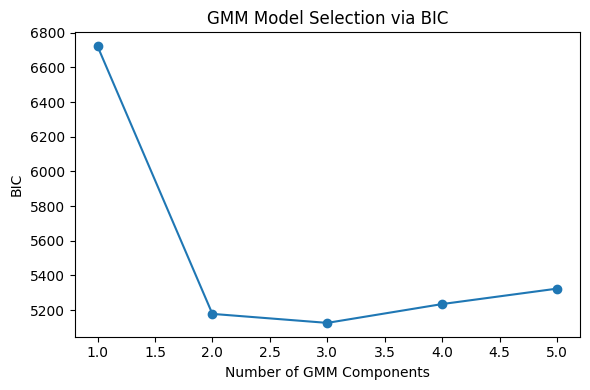

In [ ]:
bic_scores = []
max_comp = 5
n_components_range = range(1,max_comp+1) #try 1 to 5 components

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

#min bic
optimal_bic = min(bic_scores)
optimal_n_components = bic_scores.index(optimal_bic) + 1
print("Optimal number of components of GMM :", optimal_n_components)

#then re_fit the optimal GMM
gmm_optimal = GaussianMixture(n_components=optimal_n_components, covariance_type='full', random_state=42)
gmm_optimal.fit(X)
clusters_gmm = gmm_optimal.predict(X)

#calculate ari wrt to kmeans with 3 components (same as GMM)
optimal_kmean_model = KMeans(n_clusters=3, random_state=42).fit(X)
cluster_Kmeans_labels = optimal_kmean_model.fit_predict(X)

ari_kmeans_gmm = adjusted_rand_score(clusters_gmm, cluster_Kmeans_labels)
print(f"Adjusted Rand Index (GMM vs K‑Means): {ari_kmeans_gmm:.3f}")

# Plot BIC curve
plt.figure(figsize=(6,4))
plt.plot(range(1,6), bic_scores, marker='o')
plt.xlabel('Number of GMM Components')
plt.ylabel('BIC')
plt.title('GMM Model Selection via BIC')
plt.tight_layout()
plt.savefig('gmm_bic.png', dpi=150)
plt.show()

#the minimum is the optimal